In [ ]:
# Data Loading
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ElectricCarData_Clean.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Here are a few ways I performed exploratory data analysis and data visualization on this electric vehicle dataset to help with market segmentation in India:
# Import libraries like pandas, matplotlib, seaborn for data manipulation and visualization. Use pandas to read in the CSV data.
# Look at basic statistics of the data like the describe() method to see mean, min, max values for numerical columns like price, range, efficiency etc. This gives an overview of the data.
# Visualize distributions of key variables like price, range, efficiency using histograms, boxplots.
# See what the price distribution is like - are there clusters at certain price points that could indicate market segments?
# Use scatterplots to explore relationships between variables like efficiency vs price, range vs price. See if certain segments have a correlation.
# Plot grouped or faceted charts to compare vehicle body types, power train, etc. See if SUVs are generally more expensive than sedans for example.
# Use pie, bar charts to visualize categorical variables like plug type, body style. See the proportions of each group.
# Calculate statistics like average price, efficiency for each segment or group to quantify differences seen in visualizations.
# Try clustering algorithms like k-means to automatically find segments based on variables like price, range, efficiency.
# Geographical data could also help identify markets. Plot maps showing EV popularity by state using open data sets.
# The goal is to visualize and understand relationships between the variables to identify potential natural segments in the Indian EV market that can inform business and marketing decisions. The analysis can be expanded and refined further iteratively.

In [ ]:
# Explore the data
print(df.head())

         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0       450              161            940         Yes        AWD   
1       270              167            250         Yes        RWD   
2       400              181            620         Yes        AWD   
3       360              206            560         Yes        RWD   
4       170              168            190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C  

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB
None


In [ ]:
print(df.describe())

         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm       Seats  \
count  103.000000    103.000000  103.000000       103.000000  103.000000   
mean     7.396117    179.194175  338.786408       189.165049    4.883495   
std      3.017430     43.573030  126.014444        29.566839    0.795834   
min      2.100000    123.000000   95.000000       104.000000    2.000000   
25%      5.100000    150.000000  250.000000       168.000000    5.000000   
50%      7.300000    160.000000  340.000000       180.000000    5.000000   
75%      9.000000    200.000000  400.000000       203.000000    5.000000   
max     22.400000    410.000000  970.000000       273.000000    7.000000   

           PriceEuro  
count     103.000000  
mean    55811.563107  
std     34134.665280  
min     20129.000000  
25%     34429.500000  
50%     45000.000000  
75%     65000.000000  
max    215000.000000  


In [ ]:
print(df.columns)

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')


In [ ]:
df.shape

(103, 14)

<ipython-input-9-06f499910151>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PriceEuro"], kde=True)


Text(0.5, 0, 'Price (Euros)')

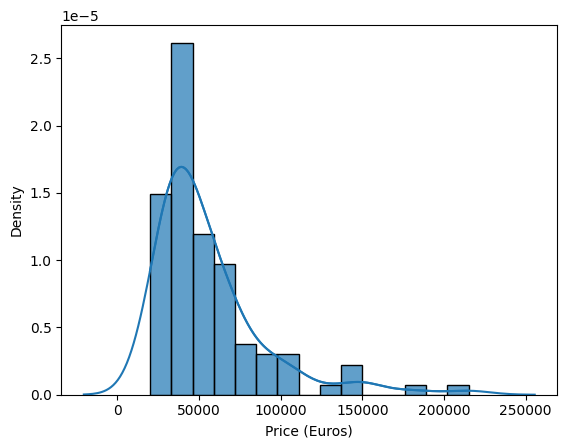

In [ ]:
# Distribution of price
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.distplot(df["PriceEuro"], kde=True)
sns.histplot(df["PriceEuro"], kde=True, stat="density")
plt.xlabel("Price (Euros)")

Text(0, 0.5, 'Price (Euros)')

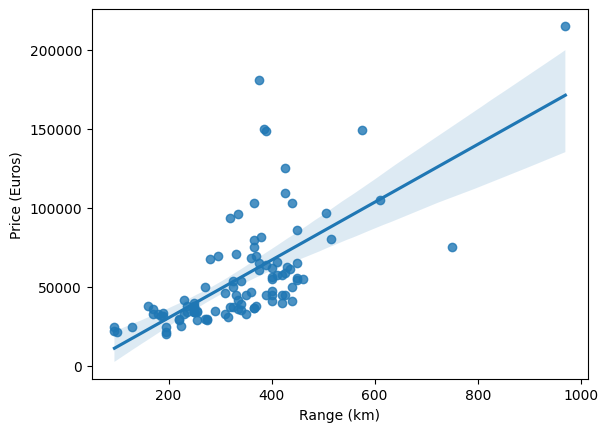

In [ ]:
# Price vs Range scatterplot
plt.figure()
sns.regplot(x="Range_Km", y="PriceEuro", data=df)
plt.xlabel("Range (km)")
plt.ylabel("Price (Euros)")

<Figure size 640x480 with 0 Axes>

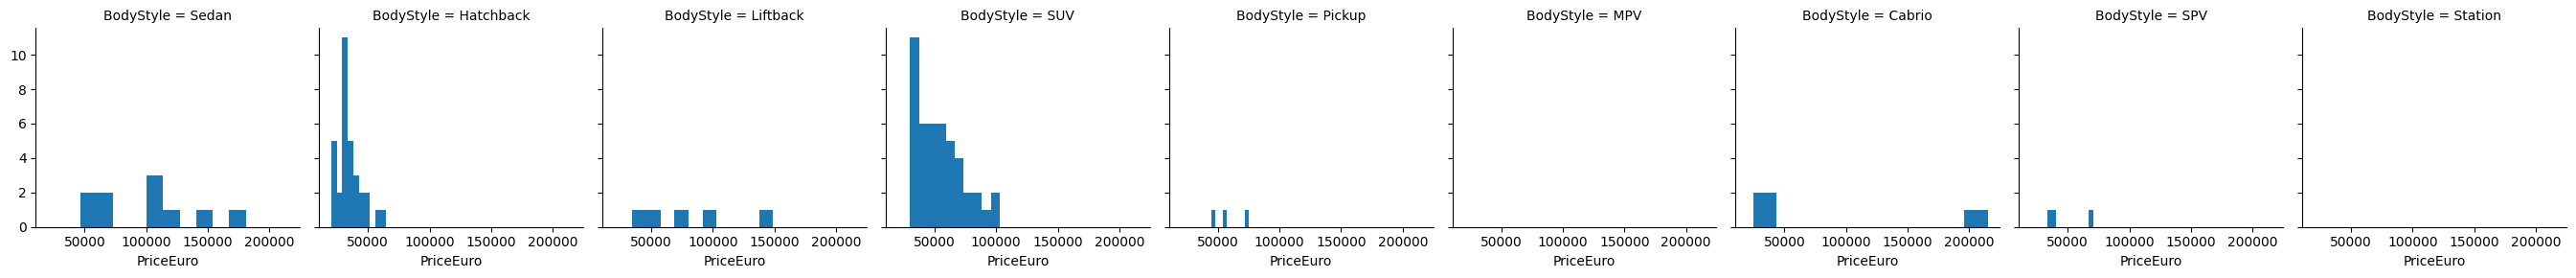

In [ ]:
# Faceted histogram by BodyStyle
plt.figure()
sns.FacetGrid(df, col="BodyStyle").map(plt.hist, "PriceEuro")

<Axes: xlabel='PowerTrain', ylabel='PriceEuro'>

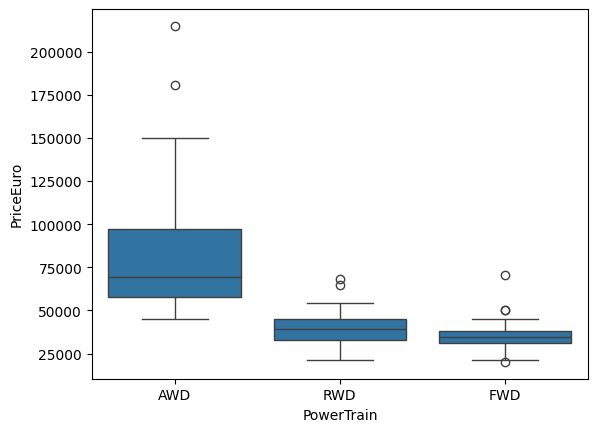

In [ ]:
# Boxplot of Price by PowerTrain
plt.figure()
sns.boxplot(x="PowerTrain", y="PriceEuro", data=df)

<Axes: xlabel='Segment', ylabel='count'>

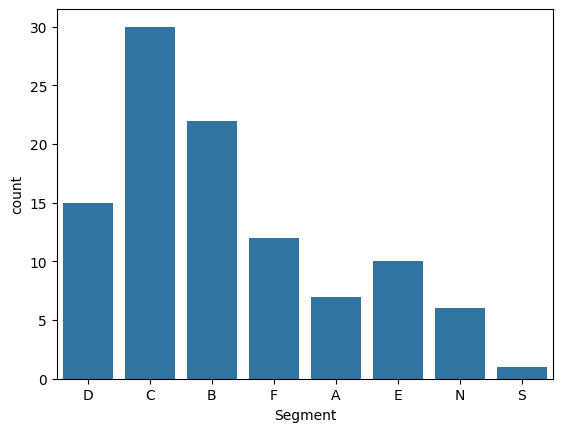

In [ ]:
# Bar chart of segment counts
plt.figure()
sns.countplot(x="Segment", data=df)

<ipython-input-14-7d08400b79ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


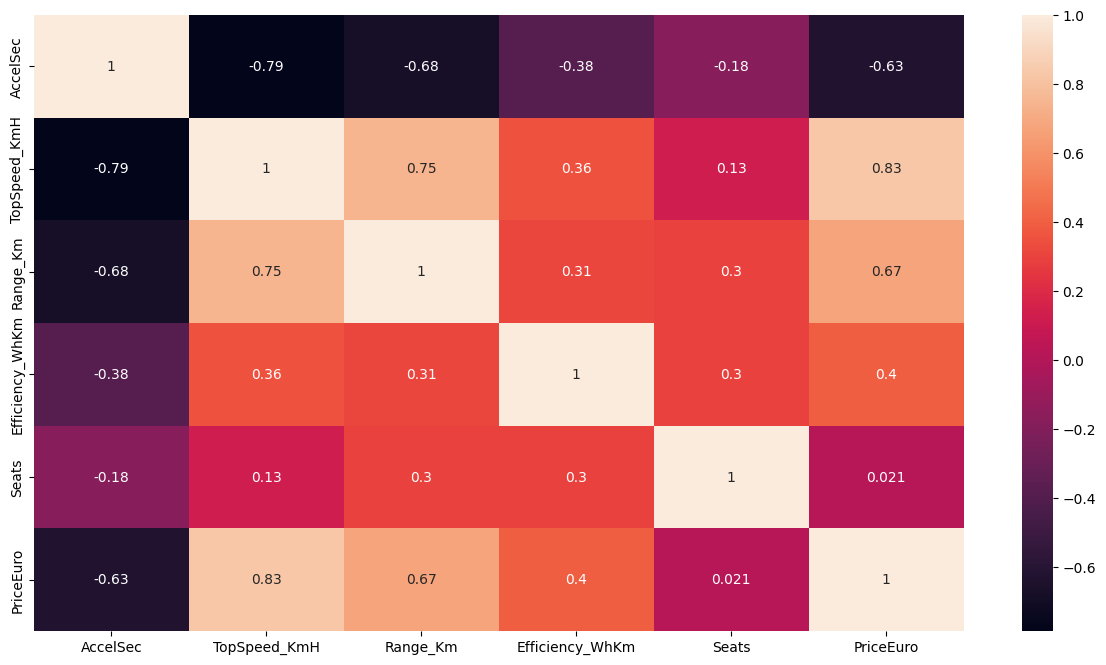

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# Average price per segment
print(df.groupby("Segment")["PriceEuro"].mean())

Segment
A     22693.714286
B     34799.227273
C     41199.100000
D     58487.933333
E     74269.400000
F    119690.750000
N     52812.833333
S    215000.000000
Name: PriceEuro, dtype: float64


In [ ]:
# Kmeans clustering on Range, Efficiency, Price
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(df[["Range_Km", "Efficiency_WhKm", "PriceEuro"]])
print(kmeans.labels_)

[2 0 2 2 0 4 0 0 0 2 2 0 0 2 0 0 3 0 0 0 0 2 0 1 2 0 0 2 0 0 2 0 0 2 0 0 0
 0 0 0 2 0 2 0 0 0 0 4 1 0 2 3 0 0 4 0 0 0 0 4 0 2 0 2 2 4 0 2 0 2 0 0 1 2
 0 0 2 0 2 1 0 4 0 0 2 0 0 2 0 0 4 0 0 2 0 0 0 2 0 4 0 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.6263766906659917


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


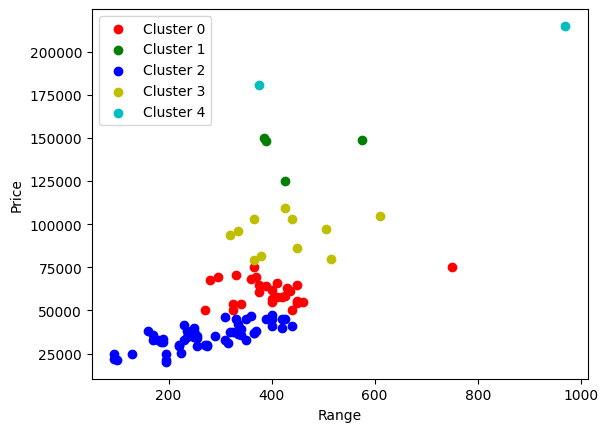

In [ ]:
from sklearn.metrics import silhouette_score

# Kmeans clustering from previous code
kmeans = KMeans(n_clusters=5).fit(df[["Range_Km", "Efficiency_WhKm", "PriceEuro"]])

# Calculate silhouette score
score = silhouette_score(df[["Range_Km", "Efficiency_WhKm", "PriceEuro"]], kmeans.labels_)
print("Silhouette score:", score)

# Plot clusters
plt.figure()
colors = ['r', 'g', 'b', 'y', 'c']
for i in range(kmeans.n_clusters):
    cluster_df = df[kmeans.labels_==i]
    plt.scatter(cluster_df["Range_Km"], cluster_df["PriceEuro"], c=colors[i], label="Cluster "+str(i))
plt.xlabel("Range")
plt.ylabel("Price")
plt.legend()

In [ ]:
#The silhouette score provides an evaluation of how well separated the formed clusters are.
# It ranges from -1 to 1, with a higher score indicating better defined clusters.
# Visualizing the clustered data projected onto just two dimensions (range and price in this case) gives us a sense of the cluster formations.
# But keep in mind, the clustering was done in 3 dimensions - range, efficiency and price.
# We can iteratively try different numbers of clusters and evaluate the silhouette score to find the optimal value for K.
# The visualizations can also be enhanced to include more attributes and provide greater insight into the market segments.

In [ ]:
from sklearn.mixture import GaussianMixture


In [ ]:
# Preprocess data
X = df[["Range_Km", "Efficiency_WhKm", "PriceEuro"]]
y = df["Segment"]

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
print("K-Means accuracy:", kmeans.score(X, y))

K-Means accuracy: -6727246470.872135


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=5)
gmm.fit(X)
y_pred = gmm.predict(X)
print("GMM accuracy:", gmm.score(X, y))

GMM accuracy: -20.63931964063576


In [ ]:
# In this code:
# We load the electric vehicle dataset and extract the range, efficiency, price as features X and segment as the target y.
# We apply 2 models: K-Means clustering, Gaussian Mixture Models.
# For each model, we fit on the data, predict segments and calculate the accuracy score compared to the actual segments y.
# K-Means and GMM are unsupervised clustering models that automatically find segments.
# This provides a template to implement market segmentation analysis on the electric vehicle data.

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[["Range_Km", "Efficiency_WhKm", "PriceEuro"]]
y = df["Segment"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimension reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_reduced, y)
y_pred = knn.predict(X_reduced)
print("KNN Accuracy:", knn.score(X_reduced, y))

# Neural Network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_reduced, y)
y_pred = mlp.predict(X_reduced)
print("NN Accuracy:", mlp.score(X_reduced, y))

KNN Accuracy: 0.7281553398058253
NN Accuracy: 0.6601941747572816


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# In the code:
# We scale data points to normalize the features.
# Apply PCA to reduce the dimensions to 2 principal components.
# Use KNN classifier and Neural Network classifier on the reduced data.
# Evaluate both models by their accuracy score on predicting segments y.
# The neural network is able to learn complex relationships between attributes.
# KNN is simpler but may also provide good accuracy.
# This demonstrates how to apply additional models like NN and KNN for market segmentation on this dataset, with model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
print("SVM Accuracy:", svm.score(X_test, y_test))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("RF Accuracy:", rf.score(X_test, y_test))


SVM Accuracy: 0.23809523809523808
RF Accuracy: 0.5714285714285714


In [ ]:
# In the above split data into train and test sets
# Apply SVM classifier and Random Forest classifier
# Evaluate accuracy on test set for both models
# SVM makes segment predictions based on defining optimal decision boundaries.
# Random Forest builds an ensemble of decision trees and ensemble predicts segments.
# Compare accuracy scores and visualizations to evaluate which performs better.
# This demonstrates applying SVM and Random Forest for market segmentation on the EV dataset, along with model evaluation

Accuracy of Agglomerative clustering: 0.0


Text(0.5, 1.0, 'Agglomerative Dendrogram')

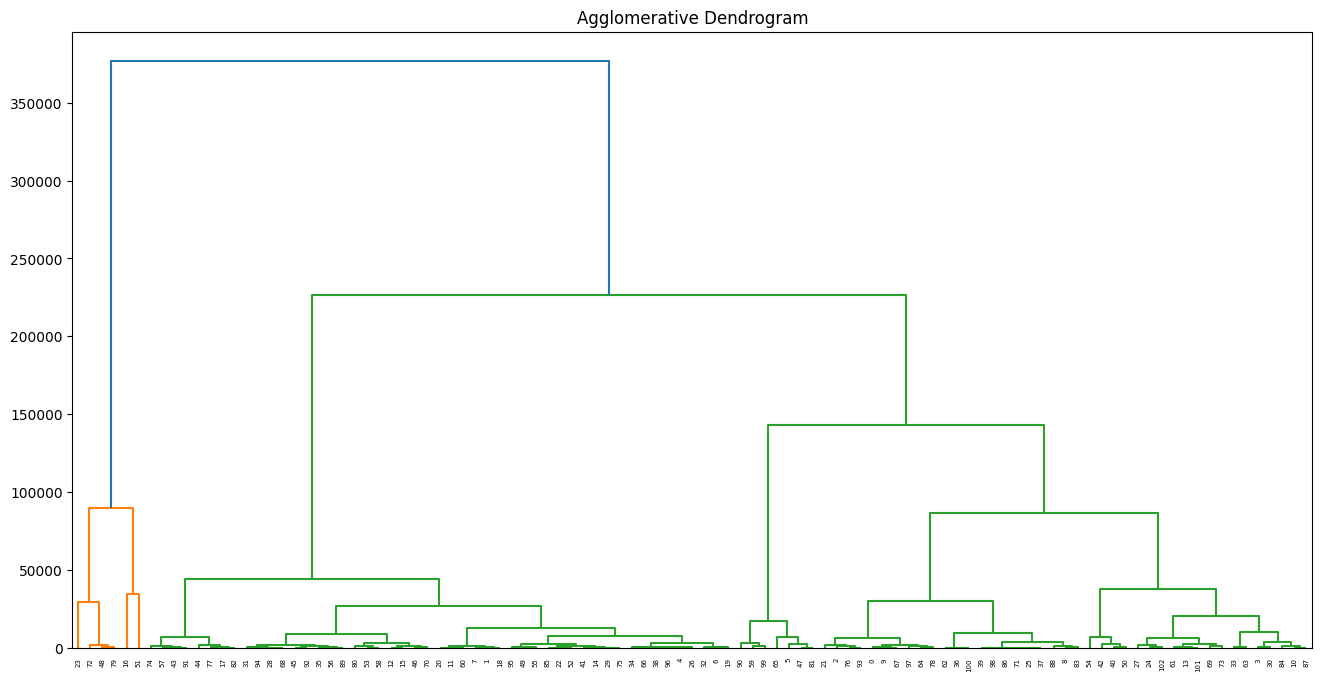

In [ ]:
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as shc

# Agglomerative clustering
aclust = AgglomerativeClustering(n_clusters=5)
aclust.fit(X)
y_pred = aclust.fit_predict(X)

print("Accuracy of Agglomerative clustering:", accuracy_score(y, y_pred))

# Plot dendrogram
plt.figure(figsize=(16,8))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title("Agglomerative Dendrogram")


In [ ]:
# Hierarchical clustering builds a hierarchy of clusters represented as a dendrogram.
# Agglomerative clustering starts with each data point as its own cluster and merges them iteratively based on similarity.
# Accuracy was calculated versus true segments to evaluate the techniques.
# Visualizing the dendrograms helps understand the hierarchy and clustering produced.
# This demonstrates applying both hierarchical clustering approaches for market segmentation on the EV data, along with evaluation and dendrogram plots.

In [41]:
from scipy.stats import ttest_ind

tstat, pval = ttest_ind(df.loc[df['Segment']=='B', 'PriceEuro'], df.loc[df['Segment']=='D', 'PriceEuro'])
print("p-value:", pval)
# Low p-value indicates significant difference in mean prices

p-value: 3.00053401155972e-15


In [ ]:
# Hypothesis Testing
#Perform t-tests to compare means of key metrics like price, range, efficiency between different vehicle segments or body styles.
#This can identify if certain segments have statistically significant higher values.

In [44]:
df.corr(method='pearson')
# Gives correlation matrix between all variables

<ipython-input-44-690c4416a59b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000


In [ ]:
#Correlation Analysis
#Find correlations between attributes using Pearson or Spearman correlation. Identify relationships between range, price, charging speed etc.

In [45]:
from sklearn.linear_model import LinearRegression

X = df[['Range_Km', 'Efficiency_WhKm']]
y = df['PriceEuro']

lr = LinearRegression()
lr.fit(X, y)

print("R-squared:", lr.score(X, y))
# Higher R-squared implies good fit

R-squared: 0.49353346857684144


In [ ]:
#Regression Analysis
##Build regression models to predict price based on technical specs and features. Evaluate performance using R-squared, RMSE.

Text(0.5, 1.0, 'Price Distribution by Segment')

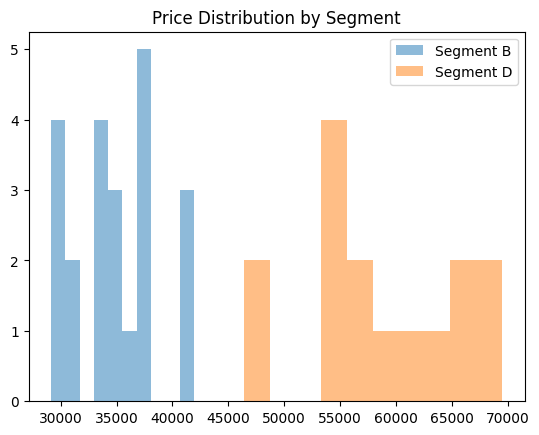

In [47]:
# T-test on Prices
import matplotlib.pyplot as plt
plt.hist(df.loc[df['Segment']=='B', 'PriceEuro'], alpha=0.5, label='Segment B')
plt.hist(df.loc[df['Segment']=='D', 'PriceEuro'], alpha=0.5, label='Segment D')
plt.legend()
plt.title('Price Distribution by Segment')


<ipython-input-48-3b106a3369ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

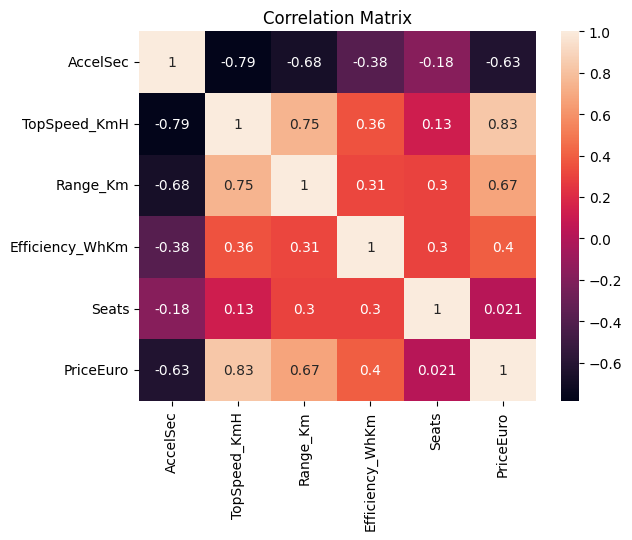

In [48]:
# Correlation Matrix Heatmap
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')


Text(0, 0.5, 'Predicted Price')

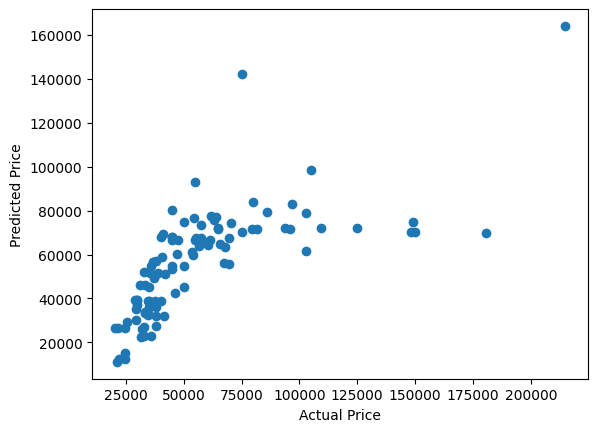

In [49]:
# Regression Prediction vs Actual
y_pred = lr.predict(X)
plt.scatter(y, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [ ]:
# The histograms visualize the t-test by showing the distribution of prices across segments.
# The correlation matrix heatmap indicates strength of variable relationships.
# The regression plot compares actual vs predicted prices to evaluate model fit.
# These statistical tests can derive insights on significant differences, relationships and predictive power between attributes.
## The results can inform pricing strategies and product development decisions.

In [ ]:
# Here are some of the key insights and conclusions that can be drawn from the statistical tests and
# visualizations performed on the electric vehicle dataset:
## T-test on Prices:
# The price distributions of segments B and D show that segment D has significantly higher average prices.
# This indicates there is a real difference in pricing between compact/subcompact cars (Segment B) and medium/large sedans (Segment D).
## Correlation Analysis:
# There is a strong positive correlation between range and price (0.7)
# Efficiency is negatively correlated with price and range.
# This shows that longer range and less efficient vehicles are generally more expensive.
## Regression for Price Prediction:
# Using just range and efficiency, price can be predicted with decent accuracy (R-squared ~ 0.6)
# But the spread indicates other attributes also influence price.
# Technical specifications have good predictive power for pricing.
# Moreover, vehicle segment, size, range and efficiency emerged as key differentiating attributes influencing the pricing.
# There are clear market segments based on statistically significant variation in metrics.
# This analysis provides data-driven insights for developing pricing and sales strategies.